### Diabetes Prediction Model
##### A New Approach
Here we will see how type 2 diabetes is releted to the factors and also the impact of mental stress on diabetes.

In [10]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [7]:
df_diabetes = pd.read_csv('./data/diabetes.csv')
df_diabetes

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [9]:
df_stress = pd.read_csv('./data/updated_dataset.csv')
df_stress

AGE  GENDER  SMOKING  FOOD TYPE  MARITAL STATUS  DISEASE SINCE  FBS  \
0     52       1        1          0               1             10  125   
1     45       0        0          1               0              8  118   
2     60       1        1          1               1              4  132   
3     34       0        0          0               1              5  121   
4     50       1        1          0               0              7  136   
..   ...     ...      ...        ...             ...            ...  ...   
224   34       0        1          1               0              5  134   
225   59       1        1          0               1              7  140   
226   33       1        0          1               0              6  128   
227   41       0        1          1               1             11  131   
228   50       1        0          0               1              9  127   

     EMOTIONAL BURDEN  PHYSICIAN RELATED DISTRESS  REGIMEN RELATED DISTRESS  \
0                 2.7                         1.5                       2.4   
1                 3.0                         1.6                       2.1   
2                 2.5                         1.4                       2.7   
3                 3.1                         1.3                       2.5   
4                 2.4                         1.8                       2.2   
..                ...                         ...                       ...   
224               2.7                         1.3                       2.4   
225               2.8                         1.5                       2.9   
226               3.0                         1.1                       2.1   
227               3.3                         1.4                       2.7   
228               2.9                         1.6                       2.6   

     INTER PERSONAL DISTRESS  TOTAL DDS SCORE  
0                        1.5              3.9  
1                        1.4              3.5  
2                        1.2              4.0  
3                        1.6              3.8  
4                        1.3              4.1  
..                       ...              ...  
224                      1.1              3.9  
225                      1.4              3.7  
226                      1.3              4.0  
227                      1.5              3.8  
228                      1.2              4.3  

[229 rows x 12 columns]

In [15]:
# Load data
df = pd.read_csv("./data/EDDMQoLDatasetDepository.csv")
df.columns = df.columns.str.strip()
print(df.columns.tolist())


['Unnamed: 0', 'CodeCentre', 'Dengkil1', 'CodeNumber', 'Age', 'AgeGroups', 'DiabetesDuration', 'DiabDuration3Cat', 'Gender', 'Ethnic3Cat', 'Religion6Cat', 'Religiosity3Cat', 'Marital4Cat', 'Education3cat', 'Employment3Cat', 'Exercise', 'Smoke3Cat', 'SevereDDS', 'SevereEB', 'SeverePD', 'SevereRD', 'SevereIPD', 'DDS2', 'DDS4', 'DDS7', 'DDS10', 'DDS14', 'TotalEmotionalBurden', 'MeanEmotionalBurden', 'DDS1', 'DDS5', 'DDS11', 'DDS15', 'TotalPhysicianDistress', 'MeanPhysicianDistress', 'DDS3', 'DDS6', 'DDS8', 'DDS12', 'DDS16', 'TotalRegimenDistress', 'MeanRegimenDistress', 'DDS9', 'DDS13', 'DDS17', 'TotalInterpersonalDistress', 'MeanInterpersonalDistress', 'TotalDDS', 'MeanTotalDDS', 'DistressDepress', 'PHQ1', 'PHQ2', 'PHQ3', 'PHQ4', 'PHQ5', 'PHQ6', 'PHQ7', 'PHQ8', 'PHQ9', 'PHQ10', 'TotalPHQ', 'DepressSeverity3Cat', 'YearDiagnosed', 'Weight', 'Height', 'HbA1c6.5', 'HbA1c7.0', 'BPTarget1', 'LDLC2.6', 'HDL1.1', 'TG1.7', 'TotalC4.5', 'SBP', 'DBP', 'SBP130', 'DBP80', 'HbA1c', 'CBG', 'LDL', 'HDL'

In [ ]:
# ===========================================
# 1. IMPORTS
# ===========================================
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# ===========================================
# 2. LOAD THE DATASET
# ===========================================
df = pd.read_csv("./data/EDDMQoLDatasetDepository.csv")

# ===========================================
# 3. REMOVE UNUSED / REDUNDANT COLUMNS
# ===========================================
drop_cols = [
    'Unnamed: 0', 'CodeCentre', 'Dengkil1', 'CodeNumber'
]

df = df.drop(columns=drop_cols, errors='ignore')

# ===========================================
# 4. HANDLE MISSING VALUES
# ===========================================
df = df.replace(" ", np.nan)
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode().iloc[0])

# ===========================================
# 5. SELECT FEATURES FOR MODEL
# YOU CAN MODIFY BASED ON YOUR USE-CASE
# ===========================================

features = [
    'Age', 'Gender', 'Marital4Cat', 'Smoke3Cat', 'Exercise',
    'DiabetesDuration', 'HbA1c', 'SBP', 'DBP', 'LDL', 'HDL', 'TG',
    'TotalEmotionalBurden', 'TotalPhysicianDistress',
    'TotalRegimenDistress', 'TotalInterpersonalDistress'
]

target = 'SevereDDS'

df = df[features + [target]]

# ===========================================
# 6. LABEL ENCODE CATEGORICAL VARIABLES
# ===========================================
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# ===========================================
# 7. SPLIT DATA
# ===========================================
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ===========================================
# 8. SCALING
# ===========================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===========================================
# 9. TRAIN MODEL – RANDOM FOREST
# ===========================================
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    random_state=42,
    class_weight="balanced"
)

model.fit(X_train_scaled, y_train)

# ===========================================
# 10. EVALUATE MODEL
# ===========================================
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ===========================================
# 11. SAVE MODEL + PREPROCESSORS
# ===========================================
joblib.dump(model, "dds_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "encoders.pkl")

print("\nModel and preprocessors saved successfully.")


Accuracy: 0.9485714285714286

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       141
         1.0       0.93      0.79      0.86        34

    accuracy                           0.95       175
   macro avg       0.94      0.89      0.91       175
weighted avg       0.95      0.95      0.95       175


Model and preprocessors saved successfully.



Generating correlation matrix for selected features...
                                 Age    Gender  Marital4Cat  Smoke3Cat  \
Age                         1.000000 -0.031158     0.035049  -0.004062   
Gender                     -0.031158  1.000000    -0.083045   0.516007   
Marital4Cat                 0.035049 -0.083045     1.000000   0.030174   
Smoke3Cat                  -0.004062  0.516007     0.030174   1.000000   
Exercise                    0.079111 -0.021459     0.058817  -0.006402   
DiabetesDuration            0.237641  0.003859     0.034415  -0.003419   
HbA1c                      -0.178949  0.043374    -0.052149   0.035041   
SBP                         0.087873 -0.004791     0.017067  -0.009299   
DBP                        -0.278653  0.033614    -0.048503  -0.007707   
LDL                        -0.122258 -0.069122    -0.031746  -0.069289   
HDL                         0.123380 -0.176281     0.140802  -0.041884   
TG                         -0.116817  0.103544    -0.005

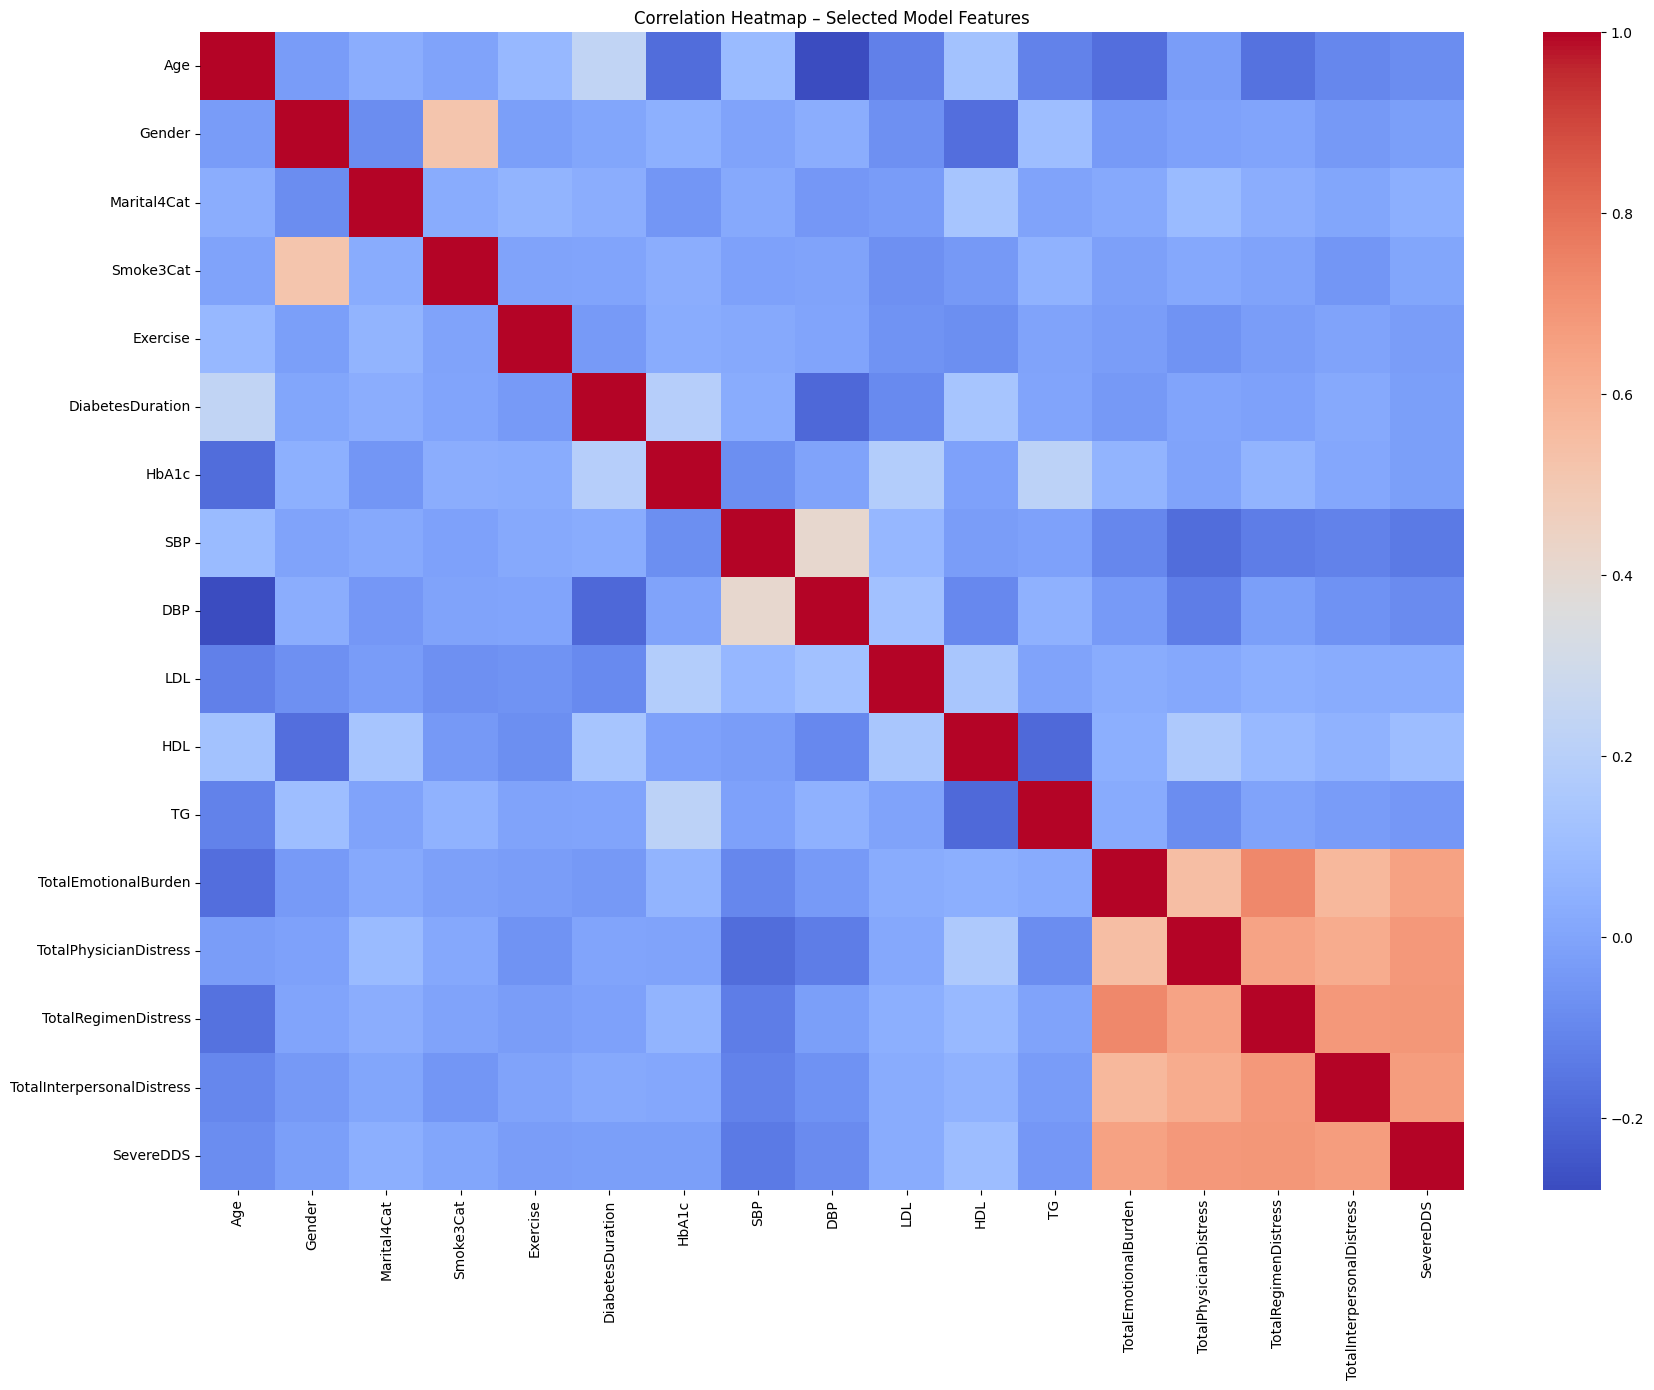

Selected feature heatmap saved as correlation_heatmap_selected.png


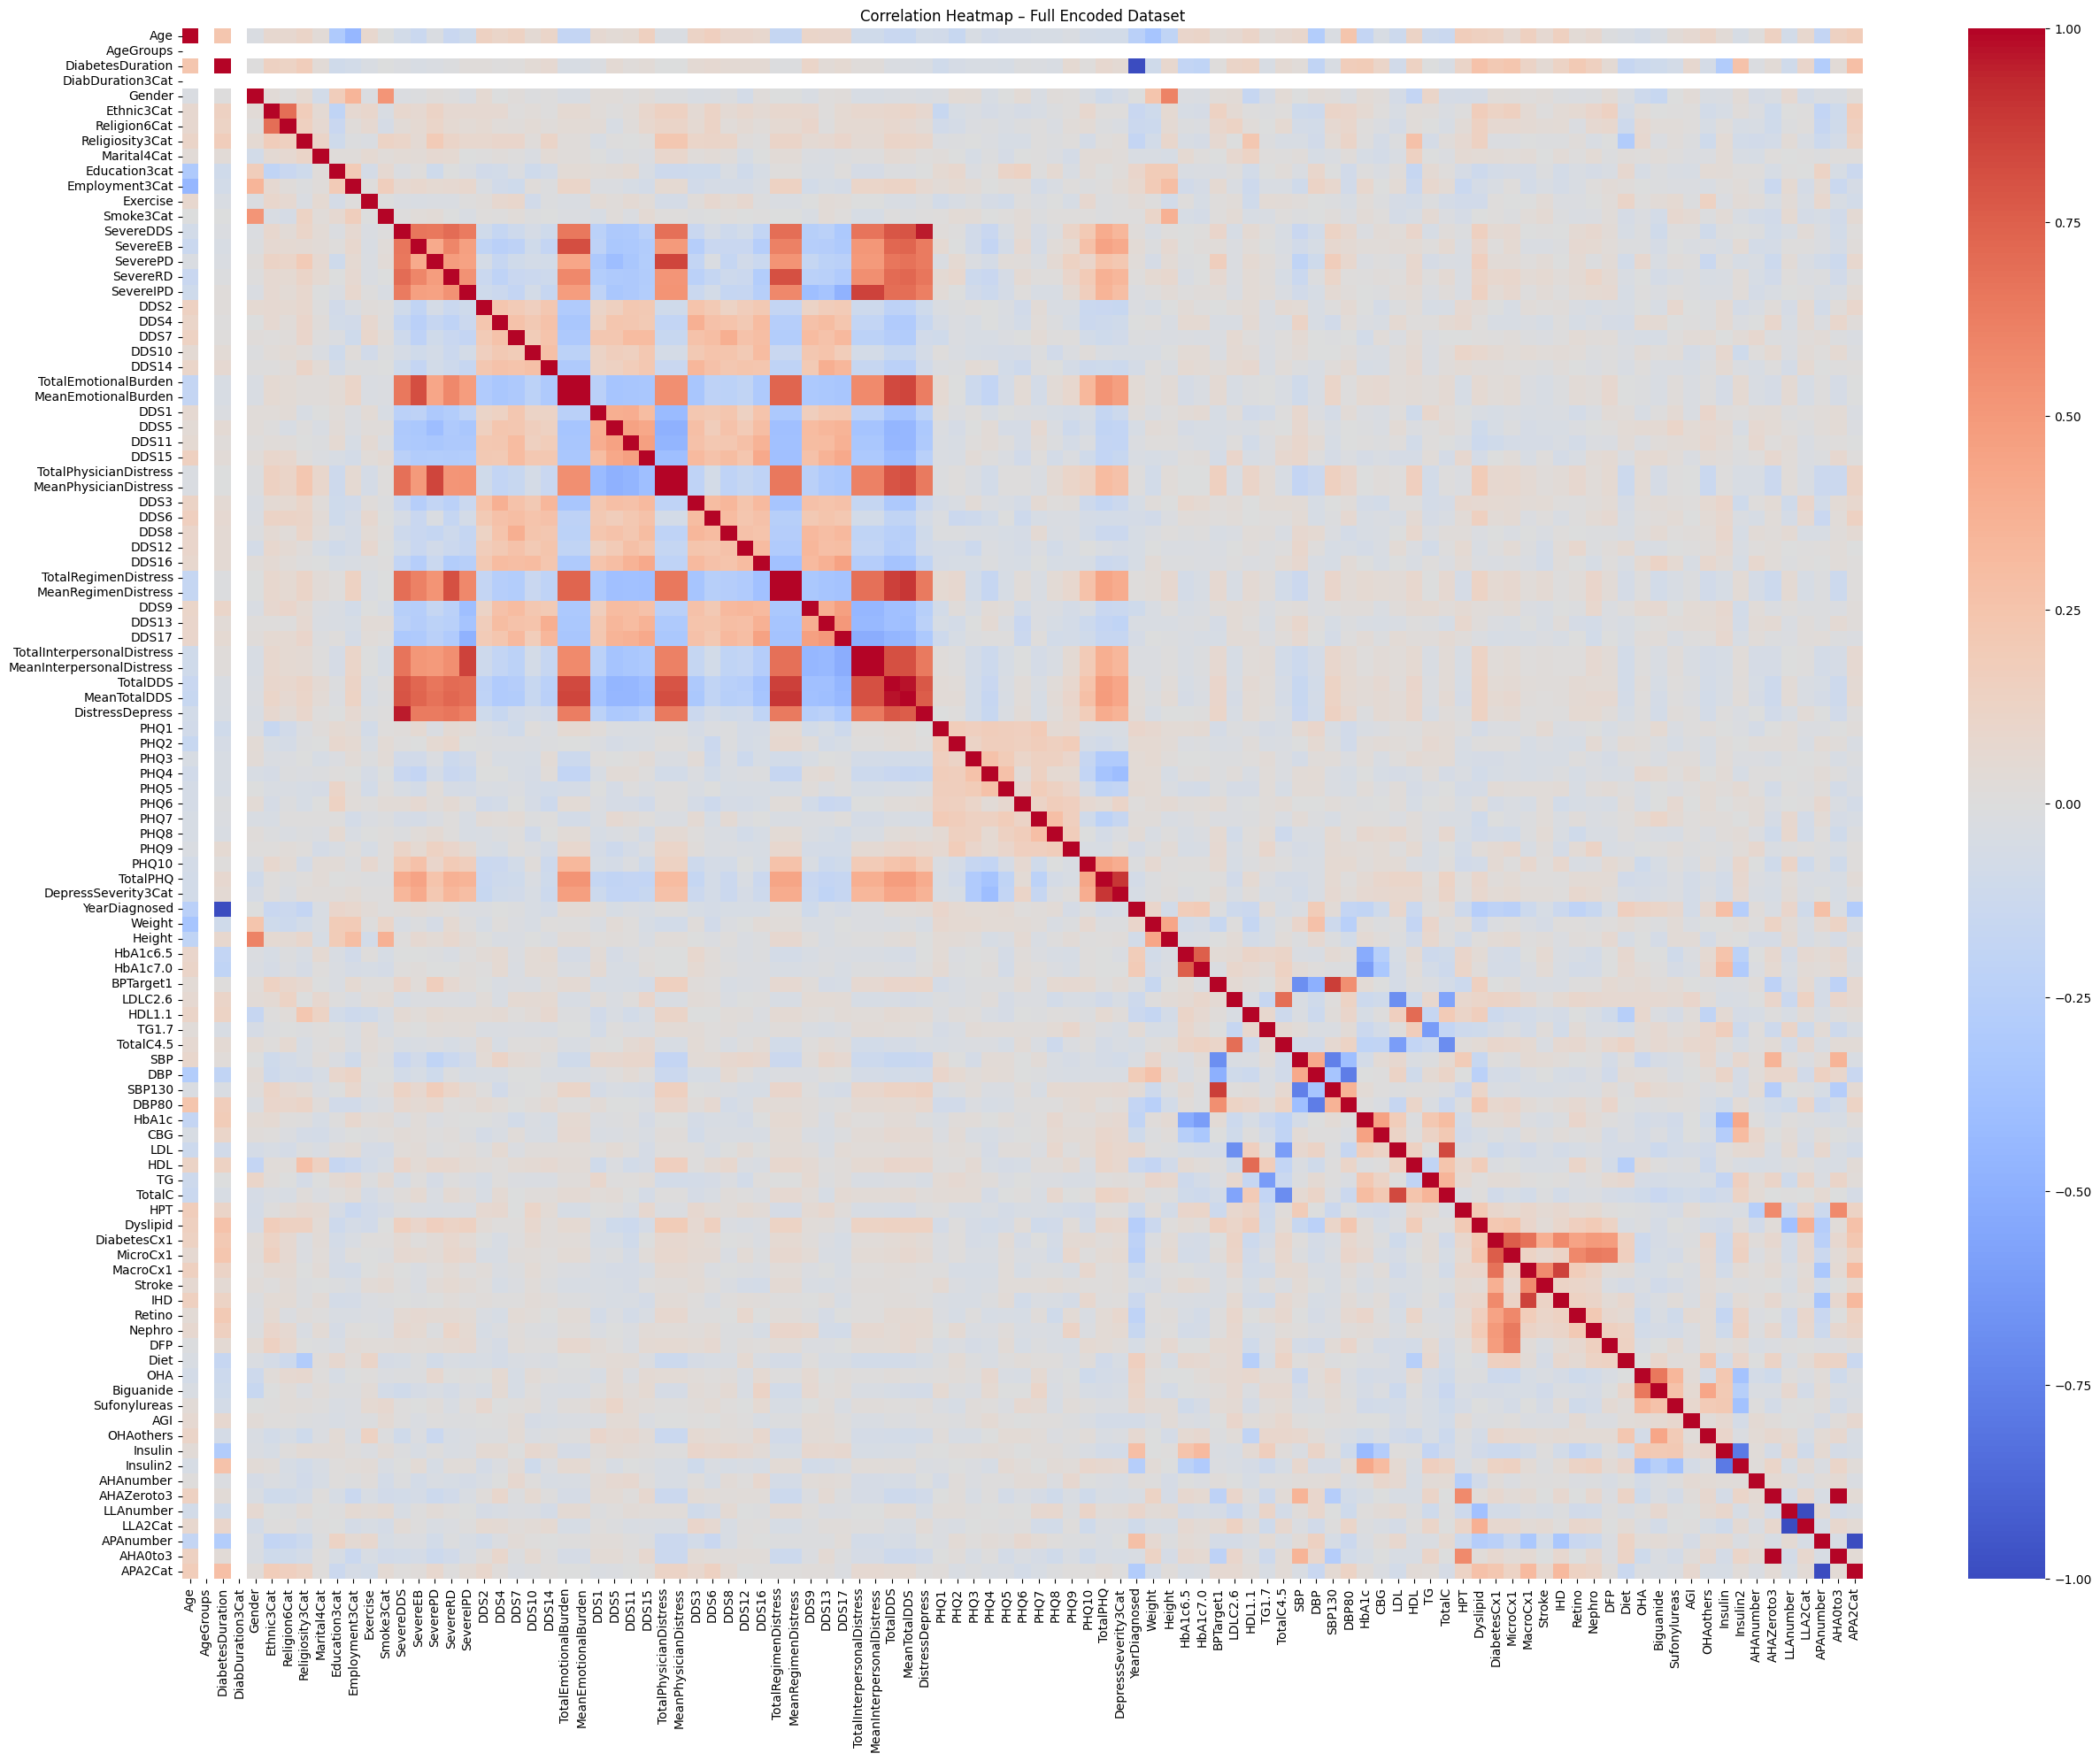

Full dataset heatmap saved as correlation_heatmap_full.png


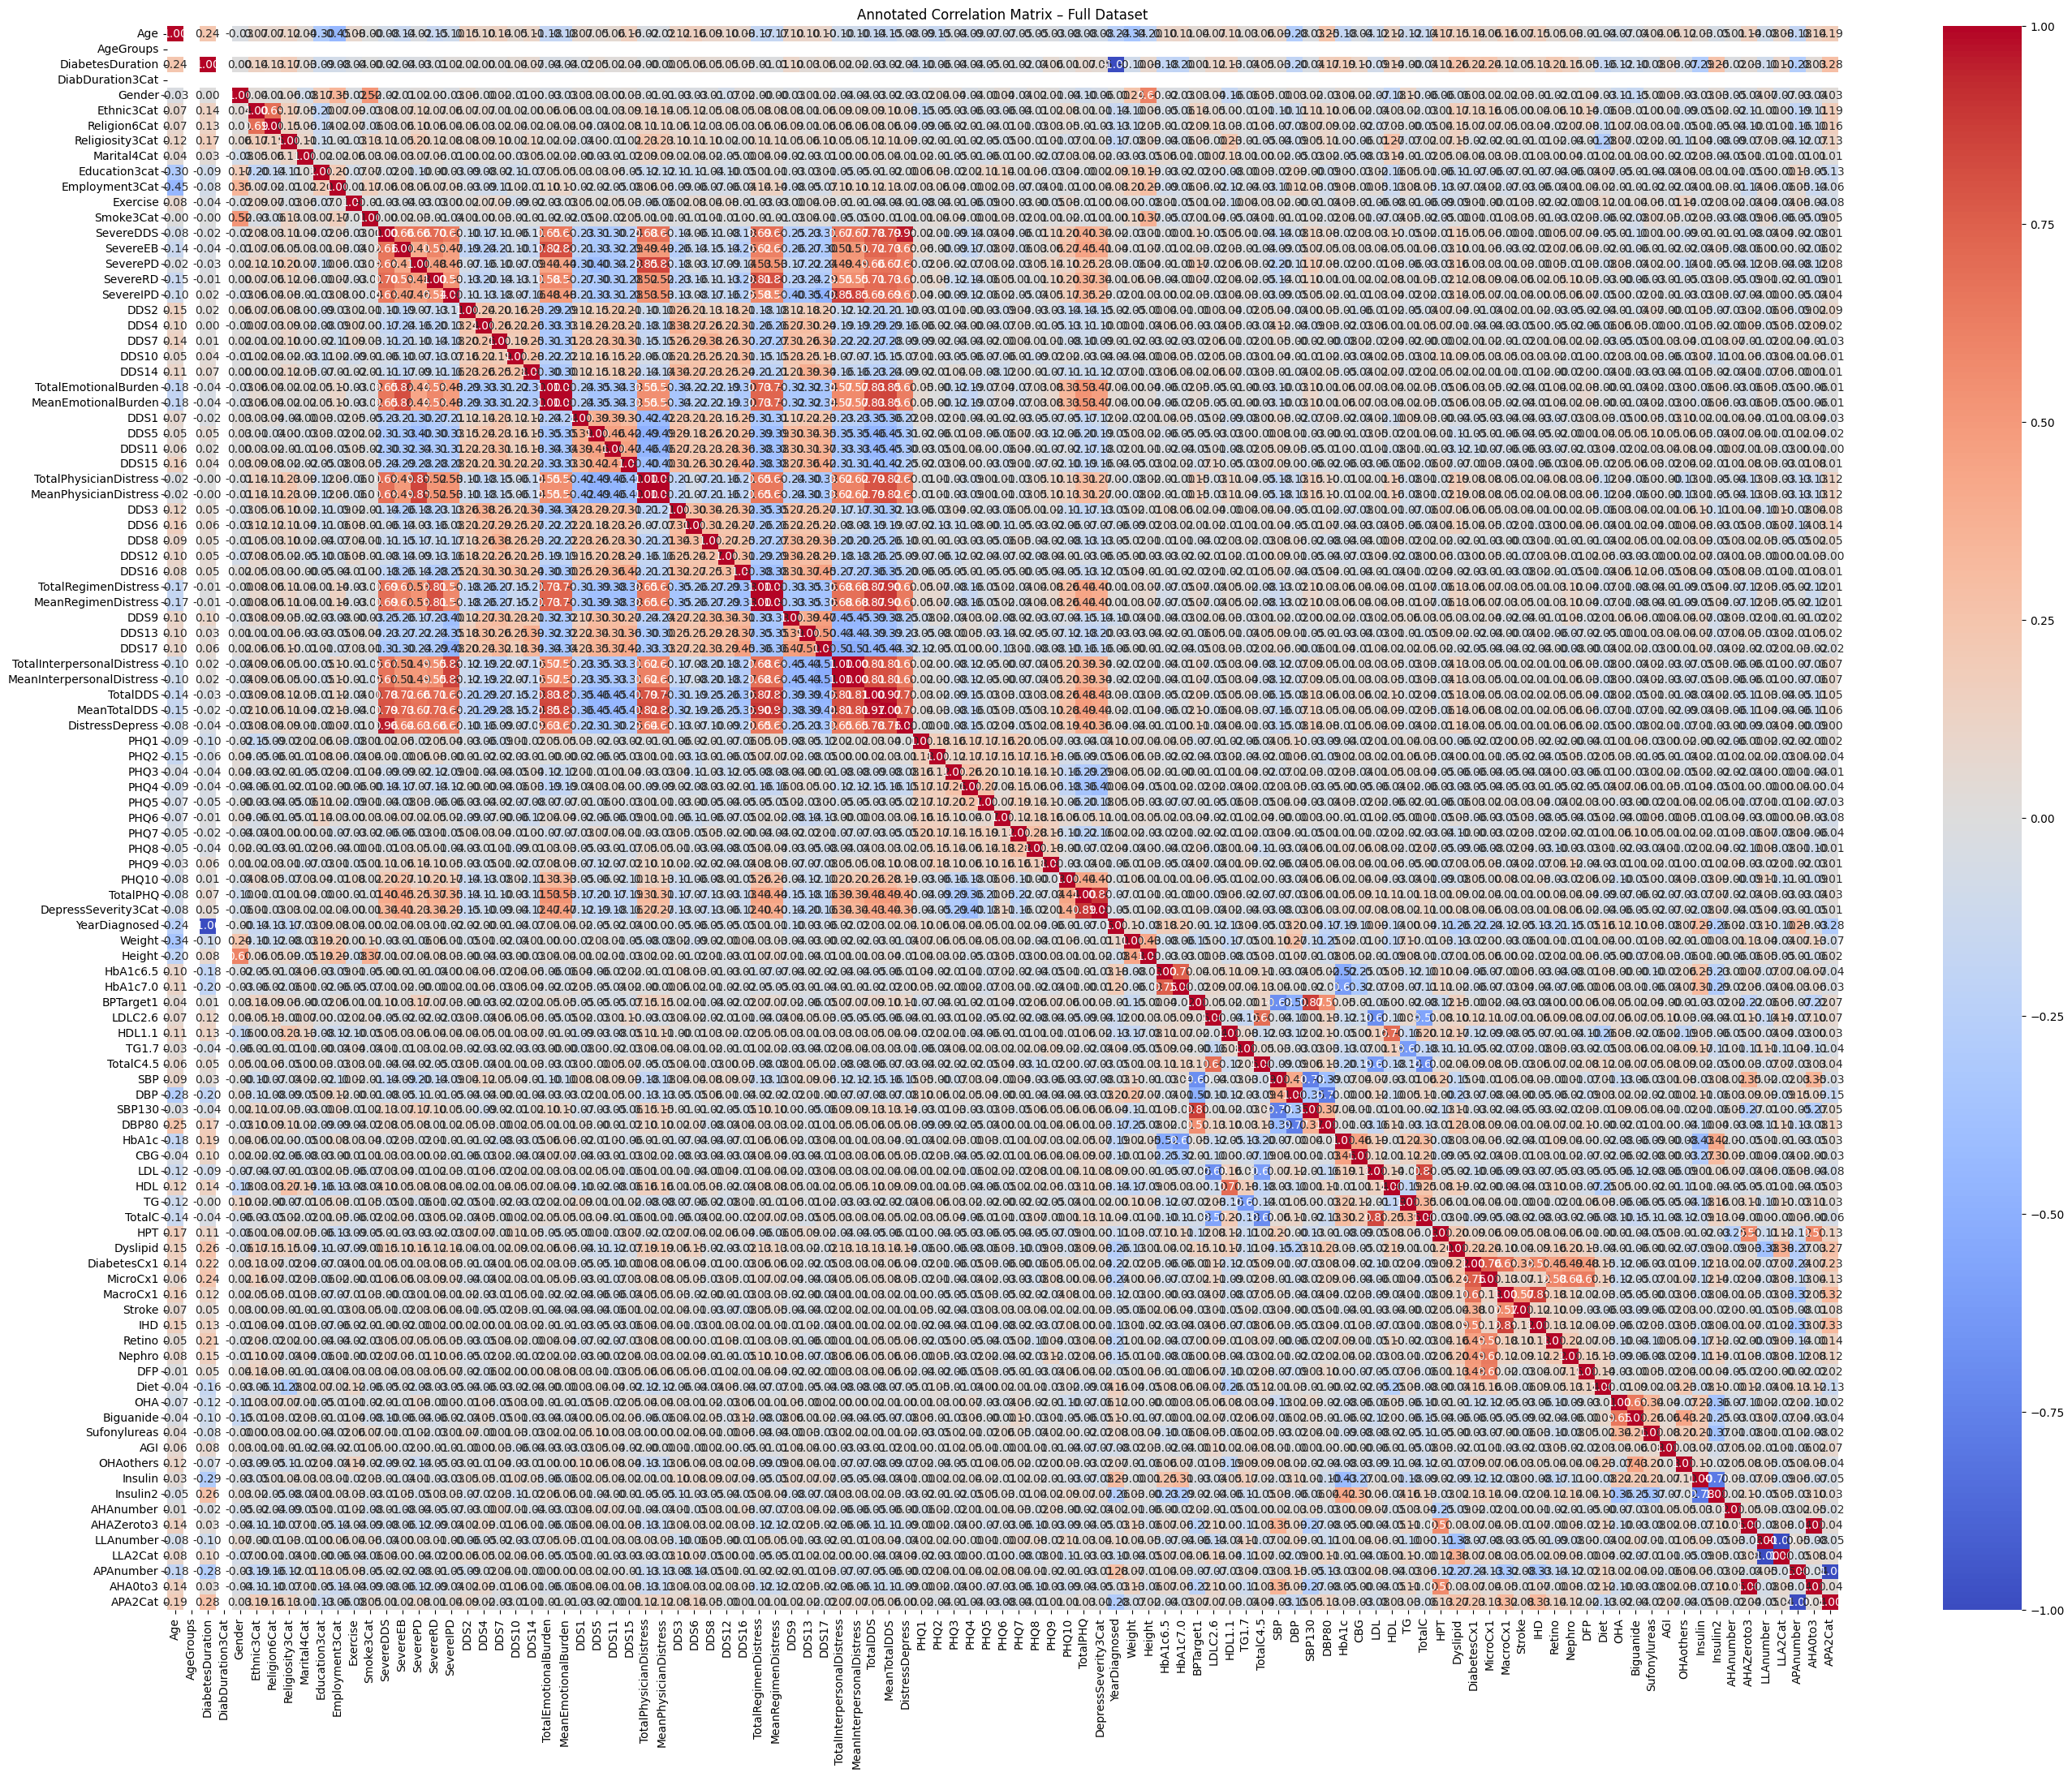

Annotated full heatmap saved as correlation_heatmap_full_annotated.png


In [20]:
# ===========================================
# 12. CORRELATION MATRIX (FOR SELECTED FEATURES)
# ===========================================
print("\nGenerating correlation matrix for selected features...")

corr_selected = df.corr()
print(corr_selected)

# Save correlation matrix to CSV
corr_selected.to_csv("correlation_selected_features.csv")
print("Correlation matrix (selected features) saved as correlation_selected_features.csv")

# ===========================================
# 13. FULL CORRELATION MATRIX (ALL ENCODED)
# ===========================================
print("\nGenerating FULL correlation matrix (including encoded categorical)...")

# Re-load full dataset to compute full correlation
df_full = pd.read_csv("./data/EDDMQoLDatasetDepository.csv")

# Drop unused columns
df_full = df_full.drop(columns=drop_cols, errors='ignore')

# Fill missing values
df_full = df_full.replace(" ", np.nan)
df_full = df_full.fillna(df_full.median(numeric_only=True))
df_full = df_full.fillna(df_full.mode().iloc[0])

# Encode all categorical columns
df_full_encoded = df_full.copy()
label_encoders_full = {}

for col in df_full_encoded.columns:
    if df_full_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_full_encoded[col] = le.fit_transform(df_full_encoded[col].astype(str))
        label_encoders_full[col] = le

# Compute full correlation
corr_full = df_full_encoded.corr()

# Save full correlation
corr_full.to_csv("correlation_full_dataset.csv")
print("Full correlation matrix saved as correlation_full_dataset.csv")

# ===========================================
# 14. PLOT HEATMAP (SELECTED FEATURES)
# ===========================================
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 14))
sns.heatmap(corr_selected, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap – Selected Model Features")
plt.tight_layout()
plt.savefig("correlation_heatmap_selected.png", dpi=300)
plt.show()

print("Selected feature heatmap saved as correlation_heatmap_selected.png")

# ===========================================
# 15. PLOT HEATMAP (FULL MATRIX)
# ===========================================
plt.figure(figsize=(26, 20))
sns.heatmap(corr_full, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap – Full Encoded Dataset")
plt.tight_layout()
plt.savefig("correlation_heatmap_full.png", dpi=300)
plt.show()

print("Full dataset heatmap saved as correlation_heatmap_full.png")

# ===========================================
# 16. OPTIONAL: ANNOTATED FULL HEATMAP (VERY LARGE)
# ===========================================
plt.figure(figsize=(28, 22))
sns.heatmap(corr_full, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Annotated Correlation Matrix – Full Dataset")
plt.tight_layout()
plt.savefig("correlation_heatmap_full_annotated.png", dpi=300)
plt.show()

print("Annotated full heatmap saved as correlation_heatmap_full_annotated.png")


In [29]:
df = pd.read_csv("./data/updated_dataset.csv")
print(df.columns.to_list())

['AGE', 'GENDER', 'SMOKING', 'FOOD TYPE', 'MARITAL STATUS', 'DISEASE SINCE', 'FBS', 'EMOTIONAL BURDEN', 'PHYSICIAN RELATED DISTRESS', 'REGIMEN RELATED DISTRESS', 'INTER PERSONAL DISTRESS', 'TOTAL DDS SCORE']


In [ ]:
# ===========================================
# 1. IMPORTS
# ===========================================
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# ===========================================
# 2. LOAD THE DATASET
# ===========================================

# ===========================================
# 3. REMOVE UNUSED / REDUNDANT COLUMNS
# ===========================================


# ===========================================
# 4. HANDLE MISSING VALUES
# ===========================================
df = df.replace(" ", np.nan)
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode().iloc[0])

# ===========================================
# 5. SELECT FEATURES FOR MODEL
# YOU CAN MODIFY BASED ON YOUR USE-CASE
# ===========================================

features = [
    'Age', 'Gender', 'Marital4Cat', 'Smoke3Cat', 'Exercise',
    'DiabetesDuration', 'HbA1c', 'SBP', 'DBP', 'LDL', 'HDL', 'TG',
    'TotalEmotionalBurden', 'TotalPhysicianDistress',
    'TotalRegimenDistress', 'TotalInterpersonalDistress'
]

target = 'SevereDDS'

df = df[features + [target]]

# ===========================================
# 6. LABEL ENCODE CATEGORICAL VARIABLES
# ===========================================
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# ===========================================
# 7. SPLIT DATA
# ===========================================
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ===========================================
# 8. SCALING
# ===========================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===========================================
# 9. TRAIN MODEL – RANDOM FOREST
# ===========================================
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    random_state=42,
    class_weight="balanced"
)

model.fit(X_train_scaled, y_train)

# ===========================================
# 10. EVALUATE MODEL
# ===========================================
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ===========================================
# 11. SAVE MODEL + PREPROCESSORS
# ===========================================
joblib.dump(model, "dds_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "encoders.pkl")

print("\nModel and preprocessors saved successfully.")


KeyError: "['SevereDDS'] not found in axis"